# Setup

## Imports and functions

In [1]:
import numpy as np
print (np.__version__)
import pandas as pd
print (np.__path__)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from scipy.stats import skew
from __future__ import division, print_function, unicode_literals
import os

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

1.13.0
['/Users/pieter/Dev/ML/jupieter/env/lib/python3.6/site-packages/numpy']


In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "house_prices"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

def score_predictions(prediciton_train, y_train, prediction_test, y_test):
    print("Train")
    get_score(prediciton_train, y_train)
    print("Test")
    get_score(prediction_test, y_test)    

# Shows scores for train and validation sets    
def train_test(estimator, X_train, X_test, y_train, y_test):
    prediction_train = estimator.predict(X_train)
    prediction_test = estimator.predict(X_test)
    # Printing estimator
    print(estimator)
    score_predictions(prediction_train, y_train, prediction_test, y_test)

    

## Import Data

In [4]:
train = pd.read_csv('data/house/train.csv')
test = pd.read_csv('data/house/test.csv')
train_labels = train.SalePrice

# Explore Data

## Train Label

In [5]:
train_labels.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.88287575977


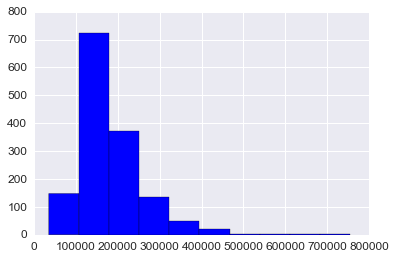

In [6]:
print ("Skew is:", train_labels.skew())
plt.hist(train_labels, color='blue')
plt.show()

Skew is: 0.121335062205


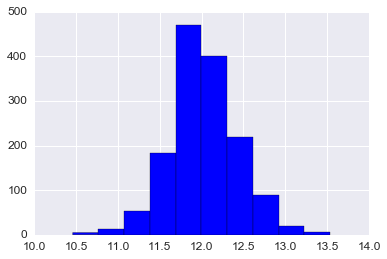

In [7]:
train_labels = np.log(train_labels)
print ("Skew is:", train_labels.skew())
plt.hist(train_labels, color='blue')
plt.show()

## NAN values

In [8]:
#Checking for missing data
NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
NAs[NAs.sum(axis=1) > 0]

,Train,Test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [9]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)
train.head()

Train data shape: (1460, 81)
Test data shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


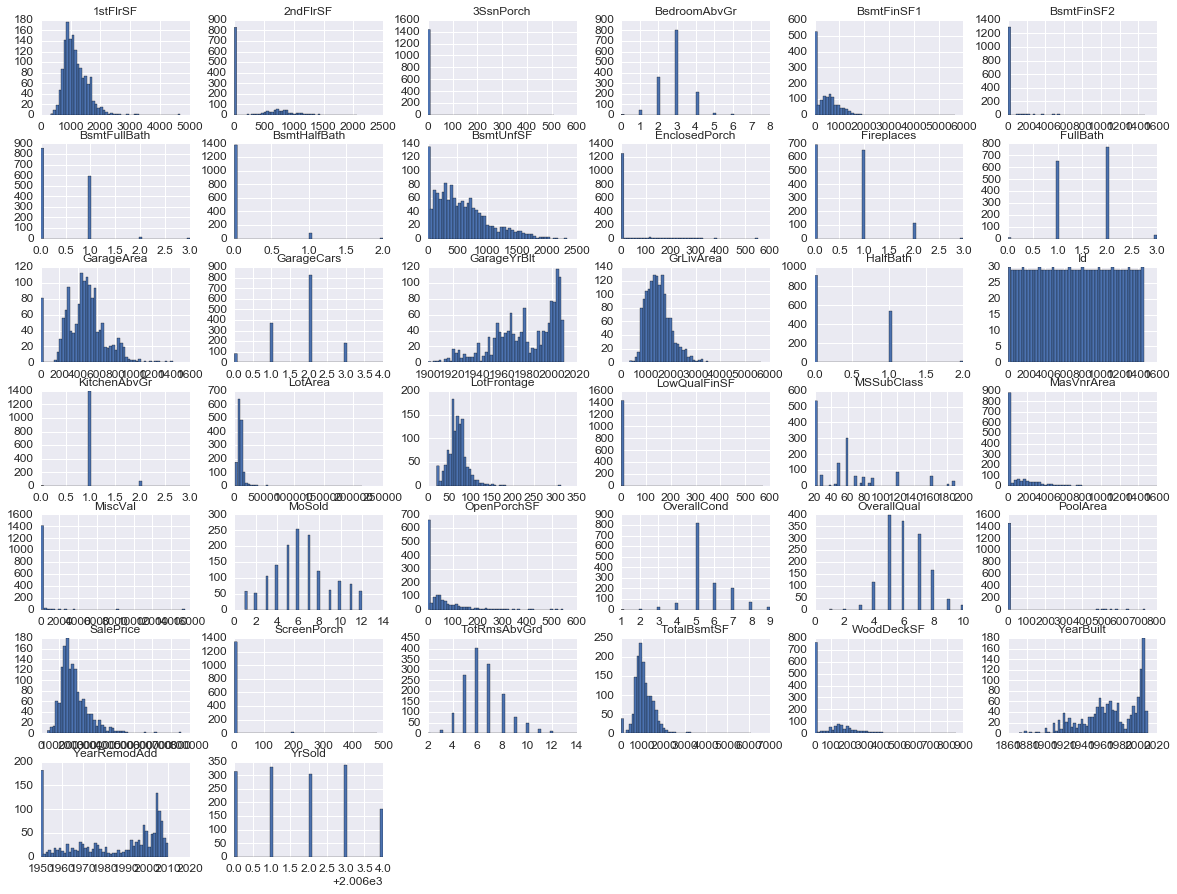

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [13]:
# corr_data = numeric_features.merge(train_labels.to_frame(), left_index=True, right_index=True)
corr = train.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [14]:
train.OverallQual.unique()
quality_pivot = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)

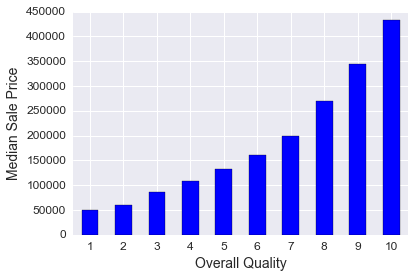

In [15]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

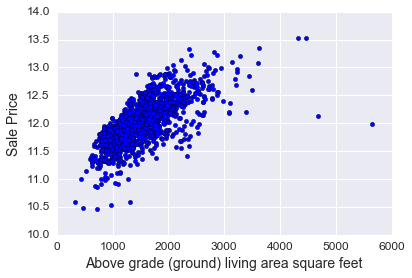

In [16]:
plt.scatter(x=train['GrLivArea'], y=train_labels)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

In [17]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [18]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



## Outliars

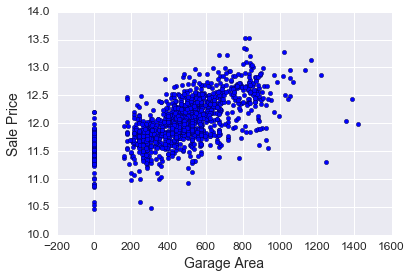

In [19]:
plt.scatter(x=train['GarageArea'], y=train_labels)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [20]:
train = train[train.GarageArea < 1200]
train_labels = np.log(train.SalePrice)

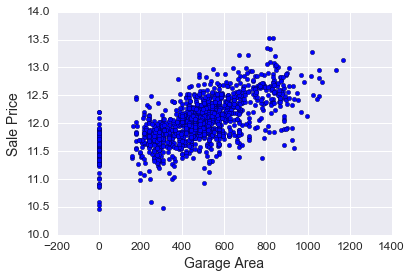

In [21]:
plt.scatter(x=train['GarageArea'], y=train_labels)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [22]:
todelete = train.SalePrice.pop

# Missing Values

In [23]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


## LotFrontage/LotArea

In [24]:
train['LotFrontage'].corr(train['LotArea'])

0.39204926776458637

In [25]:
train['SqrtLotArea']=np.sqrt(train['LotArea'])
train['LotFrontage'].corr(train['SqrtLotArea'])

0.58235250334402588

In [26]:
cond = train['LotFrontage'].isnull()
train.LotFrontage[cond]=train.SqrtLotArea[cond]

In [27]:
del train['SqrtLotArea']

## combining train and test

In [28]:
del train['SalePrice']
features = pd.concat([train, test], keys=['train', 'test'])

In [29]:
# Alley  NA in all. NA means no access
features['Alley'] = features['Alley'].fillna('NOACCESS')

# MasVnrType NA in all. filling with most popular values
features['MasVnrType'] = features['MasVnrType'].fillna('None')
features['MasVnrArea'] = features['MasVnrArea'].fillna(0.0)

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# NA in all. NA means No basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')
    
# Electrical NA in pred. filling with most popular values
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])

# FireplaceQu  NA in all. NA means No Fireplace
features['FireplaceQu'] = features['FireplaceQu'].fillna('None')

# Garages
for col in ('GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea'):
    if features[col].dtype==np.object:
        features[col] = features[col].fillna('None')
    else:
        features[col] = features[col].fillna(0)

#Pool QC
features['PoolQC'] = features['PoolQC'].fillna('None')

features['Fence'] = features['Fence'].fillna('None')

features['MiscFeature'] = features['MiscFeature'].fillna('None')


# MSSubClass as str
features['MSSubClass'] = features['MSSubClass'].astype(str)

# MSZoning NA in pred. filling with most popular values
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])


# Converting OverallCond to str
features.OverallCond = features.OverallCond.astype(str)

# TotalBsmtSF  NA in pred. I suppose NA means 0
features['TotalBsmtSF'] = features['TotalBsmtSF'].fillna(0)


# KitchenAbvGr to categorical
features['KitchenAbvGr'] = features['KitchenAbvGr'].astype(str)

# KitchenQual NA in pred. filling with most popular values
features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])


# SaleType NA in pred. filling with most popular values
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

# Year and Month to categorical
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

# Adding total sqfootage feature and removing Basement, 1st and 2nd floor features
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [30]:
features = features.fillna(features.mean())

In [31]:
features.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)

In [32]:
def encode(x): return 1 if x == 'Partial' else 'NonPartial'
features['enc_condition'] = features.SaleCondition.apply(encode)

# TODO should this one be dropped or not?
# sale_condition = features.pop('SaleCondition')

In [33]:
# Getting Dummies from all other categorical vars
for col in features.dtypes[features.dtypes == 'object'].index:
    for_dummy = features.pop(col)
    features = pd.concat([features, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [34]:
## Standardizing numeric features that are skewed

numeric_feats = features.dtypes[features.dtypes != "object"].index

skewed_feats = features[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

features[skewed_feats] = np.log1p(features[skewed_feats])

# numeric_features = features.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
# numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()
# features.update(numeric_features_standardized)

In [35]:
features.isnull().sum().max()

0

# Prepare Data

In [36]:
### Splitting features
train_features = features.loc['train'].drop('Id', axis=1)
test_features = features.loc['test'].drop('Id', axis=1)

In [37]:
print ("Train data shape:", train_features.shape)
print ("Test data shape:", test_features.shape)

Train data shape: (1455, 285)
Test data shape: (1459, 285)


In [38]:
X = train_features
y = train_labels
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

# Models

In [39]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

## Linear Regression

In [40]:
model_LR = linear_model.LinearRegression().fit(X_train, y_train)

In [41]:
train_test(model_LR, X_train, X_test, y_train, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Train
R2: 0.9498366141525577
RMSE: 0.08688191568880564
Test
R2: 0.8771220091557861
RMSE: 0.13831828987363168


In [42]:
predictions_train_LR = model_LR.predict(X_train)
predictions_test_LR = model_LR.predict(X_test)

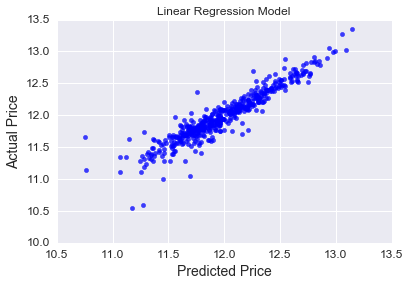

In [43]:
actual_values = y_test
plt.scatter(predictions_test_LR, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [44]:
scores_LR = cross_val_score(model_LR, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_LR.mean(), scores_LR.std() * 2))

Accuracy: 0.89 (+/- 0.03)


## Random Forest

In [45]:
model_RFR = RandomForestRegressor(random_state=42).fit(X_train, y_train)
train_test(model_RFR, X_train, X_test, y_train, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
Train
R2: 0.9695697488340971
RMSE: 0.06591573813997335
Test
R2: 0.8482567135796967
RMSE: 0.1434619159937335


In [46]:
predictions_train_RFR = model_RFR.predict(X_train)
predictions_test_RFR = model_RFR.predict(X_test)

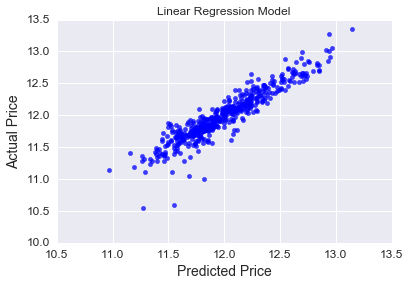

In [47]:
plt.scatter(predictions_test_RFR, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [48]:
scores_RFR = cross_val_score(model_RFR, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_RFR.mean(), scores_RFR.std() * 2))

Accuracy: 0.85 (+/- 0.02)


## DecisionTree

In [49]:
model_DTR = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
train_test(model_DTR, X_train, X_test, y_train, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')
Train
R2: 0.9999999972117695
RMSE: 2.0990788150526106e-05
Test
R2: 0.6918111879206378
RMSE: 0.22593330985633314


In [50]:
predictions_train_DTR = model_DTR.predict(X_train)
predictions_test_DTR = model_DTR.predict(X_test)

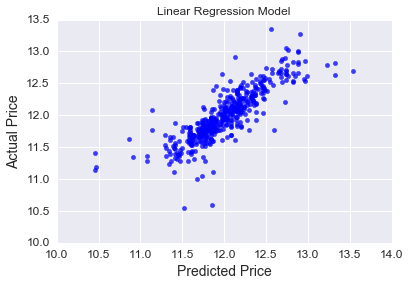

In [51]:
plt.scatter(predictions_test_DTR, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [52]:
scores_DTR = cross_val_score(model_DTR, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_DTR.mean(), scores_DTR.std() * 2))

Accuracy: 0.72 (+/- 0.05)


## ElasticNetCV

In [53]:
model_ENCV = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(model_ENCV, X_train, X_test, y_train, y_test)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
Train
R2: 0.9343250554566975
RMSE: 0.09763560182893116
Test
R2: 0.9026881179928864
RMSE: 0.11917771248051182


In [54]:
predictions_train_ENCV = model_ENCV.predict(X_train)
predictions_test_ENCV = model_ENCV.predict(X_test)

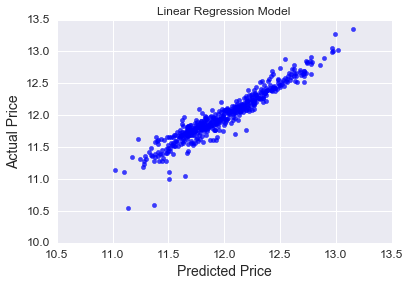

In [55]:
plt.scatter(predictions_test_ENCV, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [56]:
scores_ECNV = cross_val_score(model_ENCV, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_ECNV.mean(), scores_ECNV.std() * 2))

Accuracy: 0.91 (+/- 0.02)


## Gradient Boost

In [57]:
model_GBR = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(model_GBR, X_train, X_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Train
R2: 0.9700285525447492
RMSE: 0.06688703520313323
Test
R2: 0.9009404384636431
RMSE: 0.1211151971464808


In [58]:
predictions_train_GBR = model_GBR.predict(X_train)
predictions_test_GBR = model_GBR.predict(X_test)

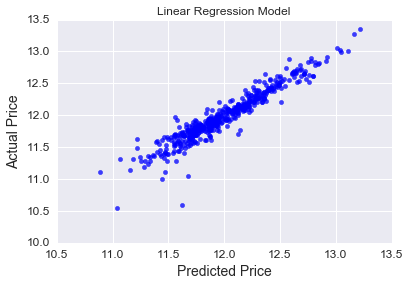

In [59]:
plt.scatter(predictions_test_GBR, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [60]:
scores_GBR = cross_val_score(model_GBR, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_GBR.mean(), scores_GBR.std() * 2))

Accuracy: 0.90 (+/- 0.03)


## Ridge Model

In [61]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

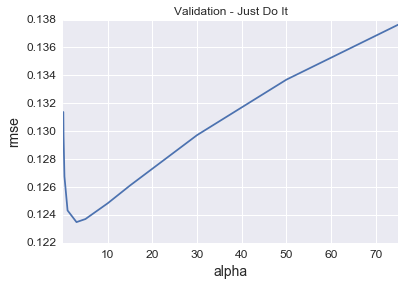

In [62]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [63]:
model_Ridge = Ridge(5).fit(X_train, y_train)
train_test(model_Ridge, X_train, X_test, y_train, y_test)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Train
R2: 0.9300138055557298
RMSE: 0.1003666123667643
Test
R2: 0.8980178259678117
RMSE: 0.12187096075340016


In [64]:
predictions_train_Ridge = model_Ridge.predict(X_train)
predictions_test_Ridge = model_Ridge.predict(X_test)

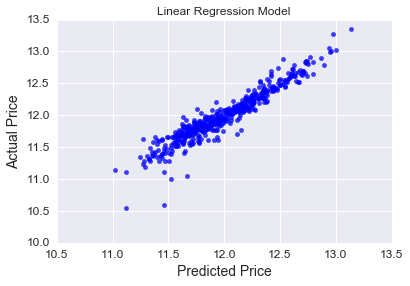

In [65]:
plt.scatter(predictions_test_Ridge, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [66]:
scores_Ridge = cross_val_score(model_Ridge, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_Ridge.mean(), scores_Ridge.std() * 2))

Accuracy: 0.91 (+/- 0.02)


## Lasso Model

In [67]:
model_LCV = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
train_test(model_LCV, X_train, X_test, y_train, y_test)

LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)
Train
R2: 0.9251561611304439
RMSE: 0.10352347505378531
Test
R2: 0.9022702485343169
RMSE: 0.1191654079647097


In [68]:
coef_LCV = pd.Series(model_LCV.coef_, index = X_train.columns)

In [69]:
print("Lasso picked " + str(sum(coef_LCV != 0)) + " variables and eliminated the other " +  str(sum(coef_LCV == 0)) + " variables")

Lasso picked 97 variables and eliminated the other 188 variables


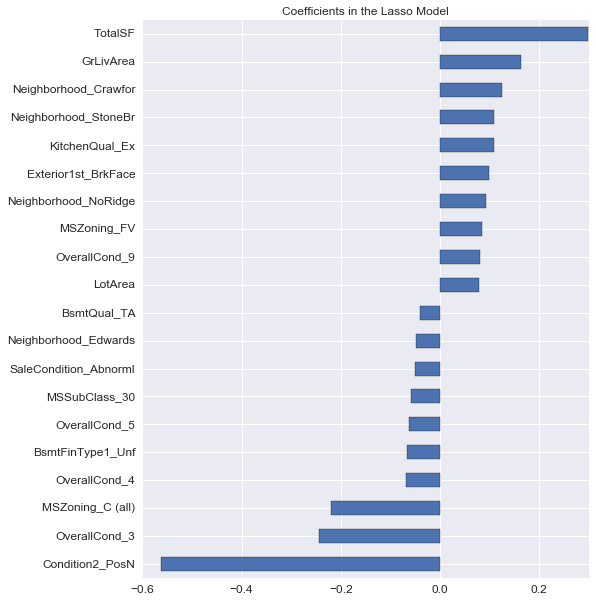

In [70]:
imp_coef = pd.concat([coef_LCV.sort_values().head(10),
                     coef_LCV.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [71]:
predictions_train_LCV = model_LCV.predict(X_train)
predictions_test_LCV = model_LCV.predict(X_test)

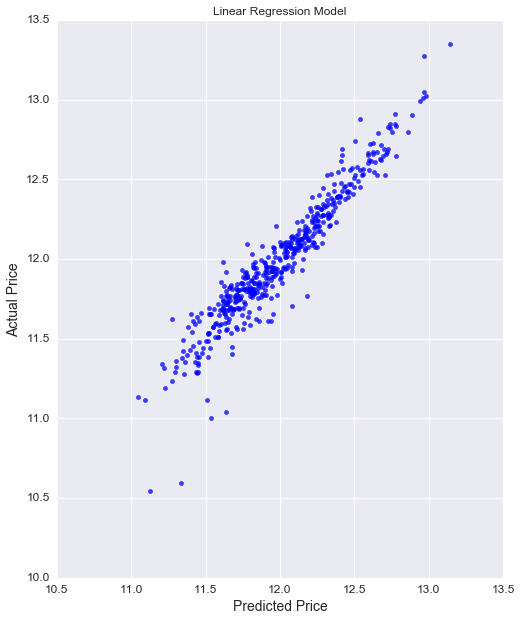

In [72]:
plt.scatter(predictions_test_LCV, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [73]:
scores_LCV = cross_val_score(model_LCV, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_LCV.mean(), scores_LCV.std() * 2))

Accuracy: 0.91 (+/- 0.02)


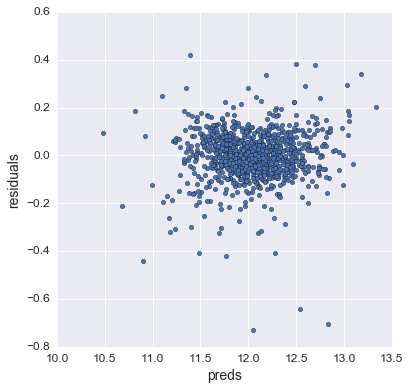

In [74]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_LCV.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

# Make Ensemble

In [88]:
portion_LR = 0.0
portion_RFR = 0.0
portion_DTR = 0.0
portion_ENCV = 0.3
portion_GBR = 0.65
portion_Ridge = 0.0
portion_LCV = 0.05
print("Sum should be 1 and is: %0.2f" % (portion_LR + portion_RFR + portion_DTR + portion_ENCV + portion_GBR + portion_Ridge + portion_LCV))

Sum should be 1 and is: 1.00


In [89]:
predictions_train_ensemble = portion_LR * predictions_train_LR + portion_RFR * predictions_train_RFR + portion_DTR * predictions_train_DTR + portion_ENCV * predictions_train_ENCV +portion_GBR * predictions_train_GBR + portion_Ridge * predictions_train_Ridge + portion_LCV * predictions_train_LCV    
predictions_test_ensemble = portion_LR * predictions_test_LR + portion_RFR * predictions_test_RFR + portion_DTR * predictions_test_DTR + portion_ENCV * predictions_test_ENCV + portion_GBR * predictions_test_GBR + portion_Ridge * predictions_test_Ridge + portion_LCV * predictions_test_LCV       

In [90]:
score_predictions(predictions_train_ensemble, y_train, predictions_test_ensemble, y_test)

Train
R2: 0.9632364562083656
RMSE: 0.07347078346707117
Test
R2: 0.9065932330007718
RMSE: 0.11697650470792871


# Submission

In [91]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [92]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

## Retrain all models on all data!!

In [93]:
model_LR.fit(train_features, train_labels)
model_RFR.fit(train_features, train_labels)
model_DTR.fit(train_features, train_labels)
model_ENCV.fit(train_features, train_labels)
model_GBR.fit(train_features, train_labels)
model_Ridge.fit(train_features, train_labels)
model_LCV.fit(train_features, train_labels)

LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [94]:
predictions_LR = model_ENCV.predict(test_features)
predictions_RFR = model_GBR.predict(test_features)
predictions_DTR = model_Ridge.predict(test_features)
predictions_ENCV = model_ENCV.predict(test_features)
predictions_GBR = model_GBR.predict(test_features)
predictions_Ridge = model_Ridge.predict(test_features)
predictions_LCV = model_LCV.predict(test_features)

In [95]:
predictions = portion_LR * predictions_LR + portion_RFR * predictions_RFR + portion_DTR * predictions_DTR + portion_ENCV * predictions_ENCV +portion_GBR * predictions_GBR + portion_Ridge * predictions_Ridge + portion_LCV * predictions_LCV    


## Submit

In [96]:
final_predictions = np.exp(predictions)

In [97]:
print ("Original predictions LR are: \n", predictions_LR[:5], "\n")
print ("Original predictions RFR are: \n", predictions_RFR[:5], "\n")
print ("Original predictions DTR are: \n", predictions_DTR[:5], "\n")
print ("Original predictions ENCV are: \n", predictions_ENCV[:5], "\n")
print ("Original predictions GBR are: \n", predictions_GBR[:5], "\n")
print ("Original predictions Ridge are: \n", predictions_Ridge[:5], "\n")
print ("Original predictions LCV are: \n", predictions_LCV[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions LR are: 
 [ 11.69501168  11.97363192  12.11793674  12.21112601  12.19446054] 

Original predictions RFR are: 
 [ 11.7551796   11.96115297  12.1344434   12.20017517  12.12914986] 

Original predictions DTR are: 
 [ 11.70533945  11.99782663  12.10483786  12.20805296  12.19399118] 

Original predictions ENCV are: 
 [ 11.69501168  11.97363192  12.11793674  12.21112601  12.19446054] 

Original predictions GBR are: 
 [ 11.7551796   11.96115297  12.1344434   12.20017517  12.12914986] 

Original predictions Ridge are: 
 [ 11.70533945  11.99782663  12.10483786  12.20805296  12.19399118] 

Original predictions LCV are: 
 [ 11.69504116  11.97267798  12.11747039  12.21144729  12.19272737] 

Final predictions are: 
 [ 124756.8979313   157231.24645231  185098.38025493  199590.69513131
  189457.86731945]


In [98]:
final_predictions = np.around(final_predictions/500)*500

In [99]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,125000.0
1,1462,157000.0
2,1463,185000.0
3,1464,199500.0
4,1465,189500.0


In [100]:
submission.to_csv('data/house/submission1.csv', index=False)